# 211 Dataset

## Upload or download data

In [3]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 4.1MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
from google.colab import drive
drive.mount('/gdrive')
# %cd /gdrive

Mounted at /gdrive


In [4]:
data_path = "/gdrive/My Drive/Colab Notebooks/AI4Good/appels_left.csv"

## Exploratory Data Ananlysis

In [96]:
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
calls_df = pd.read_csv(data_path, parse_dates=['CallDateAndTimeStart'])

In [7]:
calls_df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
calls_df.columns.to_list()

['CallReportNum',
 'CallDateAndTimeStart',
 'StateProvince',
 'Heure',
 'Code postal court',
 'Municipalité_Code',
 'Âge_x',
 "Catégorie d'âge_x",
 'Genre_x',
 'Langue_x',
 'Mode De Communication_x',
 'Municipalité_Nom',
 'Région Administrative',
 'Région administrative_Code',
 'Territoire_division',
 'Territoire_code',
 'MRC',
 'MRCEN',
 'Superficie',
 'Population',
 'Statut',
 'Territoire CMM',
 'Territoire CMM_val',
 'Centraide Grand Montréal',
 'Territoire 211 Grand Montréal',
 'TaxonomyCode_full',
 'TaxonomyName_full',
 'NeedWasUnmet',
 'ReasonIfUnmetOrPartial',
 'Level1Code',
 'Level1Name',
 'Level2Code',
 'Level2Name',
 'Level3Code',
 'Level3Name',
 'Level4Code',
 'Level4Name',
 'Level5Code',
 'Level5Name',
 'AIRSNeedCategory',
 'ReportNeedNum',
 'TaxonomyCode_main',
 'TaxonomyCode_link',
 'TaxonomyName_main',
 'TaxonomyName_link',
 'Âge_y',
 "Catégorie d'âge_y",
 'Genre_y',
 'Langue_y',
 'Mode De Communication_y']

In [9]:
cols2view = ['Âge_x', 'Âge_y',
 "Catégorie d'âge_x", "Catégorie d'âge_y",
 'Genre_x', 'Genre_y',
 'Langue_x', 'Langue_y',
 'Mode De Communication_x', 'Mode De Communication_y']
calls_df.dropna(inplace=True, subset=cols2view, axis=0)

In [10]:
calls_df.shape

(123025, 50)

In [11]:
calls_df.head()

,CallReportNum,CallDateAndTimeStart,StateProvince,Heure,Code postal court,Municipalité_Code,Âge_x,Catégorie d'âge_x,Genre_x,Langue_x,Mode De Communication_x,Municipalité_Nom,Région Administrative,Région administrative_Code,Territoire_division,Territoire_code,MRC,MRCEN,Superficie,Population,Statut,Territoire CMM,Territoire CMM_val,Centraide Grand Montréal,Territoire 211 Grand Montréal,TaxonomyCode_full,TaxonomyName_full,NeedWasUnmet,ReasonIfUnmetOrPartial,Level1Code,Level1Name,Level2Code,Level2Name,Level3Code,Level3Name,Level4Code,Level4Name,Level5Code,Level5Name,AIRSNeedCategory,ReportNeedNum,TaxonomyCode_main,TaxonomyCode_link,TaxonomyName_main,TaxonomyName_link,Âge_y,Catégorie d'âge_y,Genre_y,Langue_y,Mode De Communication_y
1,51805954,2018-04-01,QC,11,H1T,66213.0,35.0,30-39 ans,Homme,Français,Appels,Rosemont—La Petite-Patrie,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,BD-5000.8300,Repas pour les sans-abri,False,NaN,B,Besoins fondamentaux,BD,Aide alimentaire,BD-5000,Distribution de repas,BD-5000.8300,Repas pour les sans-abri,BD-5000.8300,Repas pour les sans-abri,Alimentation,12443170.0,BD-5000.8300,NaN,Repas pour les sans-abri,NaN,35.0,30-39 ans,Homme,Français,Appels
3,51806377,2018-04-01,QC,12,H1J,66201.0,40.0,40-49 ans,Homme,Français,Appels,Anjou,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,BD-1800.2250,Coupons de nourriture,False,NaN,B,Besoins fondamentaux,BD,Aide alimentaire,BD-1800,Aide alimentaire d'urgence,BD-1800.2250,Coupons de nourriture,BD-1800.2250,Coupons de nourriture,Alimentation,12443242.0,BD-1800.2250,NaN,Coupons de nourriture,NaN,40.0,40-49 ans,Homme,Français,Appels
4,51806377,2018-04-01,QC,12,H1J,66201.0,40.0,40-49 ans,Homme,Français,Appels,Anjou,Montréal,6.0,Montréal,66.0,Montréal,Montréal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,BD-1800.2000,Banques alimentaires,False,NaN,B,Besoins fondamentaux,BD,Aide alimentaire,BD-1800,Aide alimentaire d'urgence,BD-1800.2000,Banques alimentaires,BD-1800.2000,Banques alimentaires,Alimentation,12443241.0,BD-1800.2000,NaN,Banques alimentaires,NaN,40.0,40-49 ans,Homme,Français,Appels
9,51807633,2018-04-01,QC,13,H4N,66214.0,50.0,50-59 ans,Homme,Français,Appels,Saint-Laurent,Montréal,6.0,Montréal,66.0,Centre-Ouest-de-l'Ile,West Central Montreal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,PS-8000.8000,Clubs pour les célibataires,False,NaN,P,Vie personnelle et familiale,PS,Développement et enrichissement social,PS-8000,Clubs et évènements sociaux,PS-8000.8000,Clubs pour les célibataires,PS-8000.8000,Clubs pour les célibataires,Sports et loisirs,12443460.0,PS-8000.8000,NaN,Clubs pour les célibataires,NaN,50.0,50-59 ans,Homme,Français,Appels
10,51807633,2018-04-01,QC,13,H4N,66214.0,50.0,50-59 ans,Homme,Français,Appels,Saint-Laurent,Montréal,6.0,Montréal,66.0,Centre-Ouest-de-l'Ile,West Central Montreal,NaN,NaN,arrondissement,Montréal,Oui,Montréal,Oui,TC-5500.6000,Centres de quartier,False,NaN,T,"Services organisationnels, communautaires et i...",TC,Établissements et centres communautaires,TC-5500,Centres polyvalents,TC-5500.6000,Centres de quartier,TC-5500.6000,Centres de quartier,"Soutien personnel, familial et communautaire",12443463.0,TC-5500.6000,NaN,Centres de quartier,NaN,50.0,50-59 ans,Homme,Français,Appels


In [12]:
calls_df["Catégorie d'âge_x"].value_counts(normalize=True)

70 ans et plus    0.205755
60-69 ans         0.176428
50-59 ans         0.171981
30-39 ans         0.162585
40-49 ans         0.155887
20-29 ans         0.092087
0-19 ans          0.035277
Name: Catégorie d'âge_x, dtype: float64

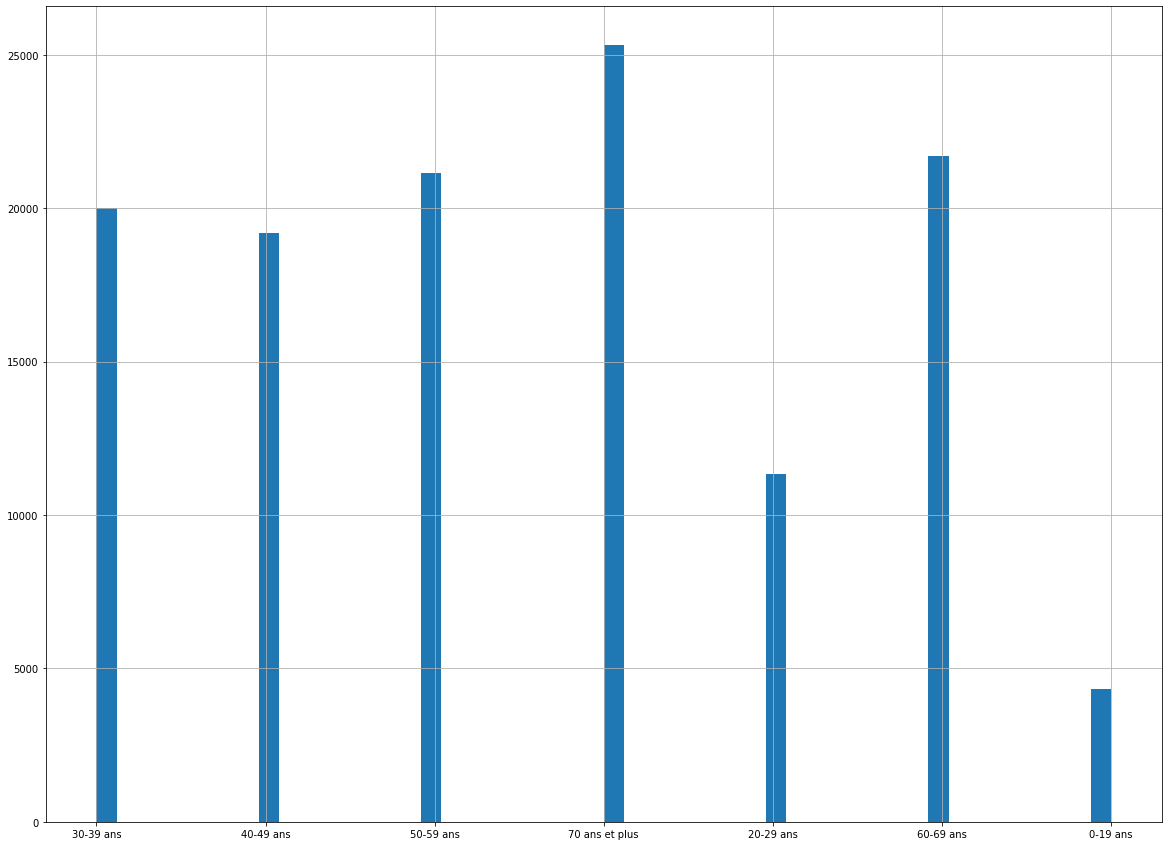

In [13]:
calls_df["Catégorie d'âge_x"].hist(bins=50, figsize=(20, 15))

In [14]:
calls_df['AIRSNeedCategory'].value_counts(normalize=True)

Alimentation                                                                           0.164226
Logement                                                                               0.152696
Bénévolat et dons                                                                      0.151123
Soutien personnel, familial et communautaire                                           0.102345
Santé mentale et dépendances                                                           0.074312
Justice, consommation et sécurité publique                                             0.073731
Santé                                                                                  0.060173
Emploi et revenu                                                                       0.055889
Information et aiguillage                                                              0.046169
Services gouvernementaux, développement économique et associations professionnelles    0.030743
Assistance matérielle                   

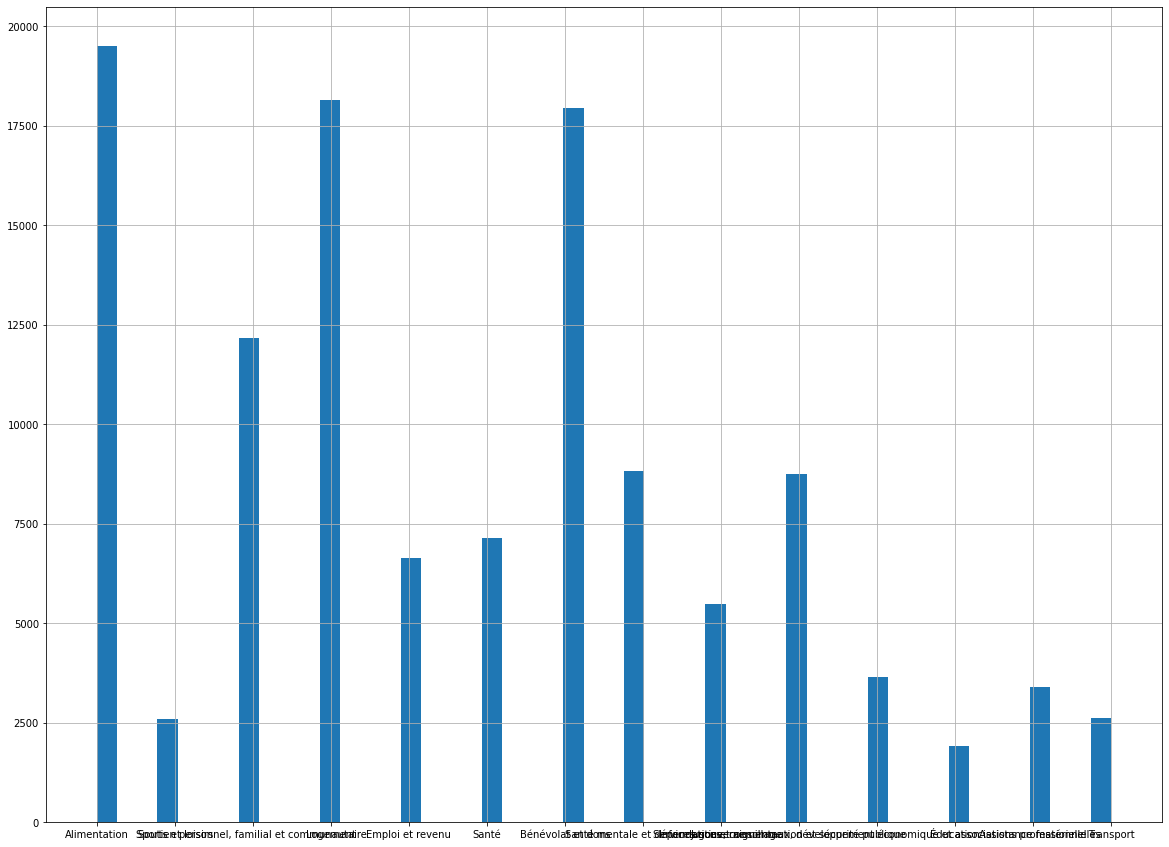

In [15]:
calls_df['AIRSNeedCategory'].hist(bins=50, figsize=(20, 15))

In [16]:
calls_df.columns[calls_df.isna().any()].tolist(), len(calls_df.columns[calls_df.isna().any()].tolist())

(['StateProvince',
  'Code postal court',
  'Municipalité_Code',
  'Municipalité_Nom',
  'Région Administrative',
  'Région administrative_Code',
  'Territoire_division',
  'Territoire_code',
  'MRC',
  'MRCEN',
  'Superficie',
  'Population',
  'Statut',
  'Territoire CMM',
  'Territoire CMM_val',
  'Centraide Grand Montréal',
  'Territoire 211 Grand Montréal',
  'TaxonomyCode_full',
  'TaxonomyName_full',
  'NeedWasUnmet',
  'ReasonIfUnmetOrPartial',
  'Level1Code',
  'Level1Name',
  'Level2Code',
  'Level2Name',
  'Level3Code',
  'Level3Name',
  'Level4Code',
  'Level4Name',
  'Level5Code',
  'Level5Name',
  'AIRSNeedCategory',
  'ReportNeedNum',
  'TaxonomyCode_main',
  'TaxonomyCode_link',
  'TaxonomyName_main',
  'TaxonomyName_link'],
 37)

In [17]:
cols2keep = [
 'CallDateAndTimeStart',
 'Heure',
 'Centraide Grand Montréal',
 'Territoire 211 Grand Montréal',
 'NeedWasUnmet',
 'AIRSNeedCategory',]
new_df = calls_df[cols2keep]

In [18]:
new_df.head()

,CallDateAndTimeStart,Heure,Centraide Grand Montréal,Territoire 211 Grand Montréal,NeedWasUnmet,AIRSNeedCategory
1,2018-04-01,11,Montréal,Oui,False,Alimentation
3,2018-04-01,12,Montréal,Oui,False,Alimentation
4,2018-04-01,12,Montréal,Oui,False,Alimentation
9,2018-04-01,13,Montréal,Oui,False,Sports et loisirs
10,2018-04-01,13,Montréal,Oui,False,"Soutien personnel, familial et communautaire"


In [19]:
new_df['Centraide Grand Montréal'].value_counts()

Montréal                       91517
Laval                          11582
Agglomération de Longueuil      7005
Région Sud                      1935
Centraide Richelieu-Yamaska      230
Inconnu                          146
Name: Centraide Grand Montréal, dtype: int64

In [20]:
new_df['Territoire 211 Grand Montréal'].value_counts()

Oui                120825
Hors territoire      1320
ancien                655
Inconnu               146
non                    12
Name: Territoire 211 Grand Montréal, dtype: int64

In [21]:
new_df['NeedWasUnmet'].value_counts()

False    116740
True       2725
Name: NeedWasUnmet, dtype: int64

In [22]:
new_df['AIRSNeedCategory'].value_counts()

Alimentation                                                                           19514
Logement                                                                               18144
Bénévolat et dons                                                                      17957
Soutien personnel, familial et communautaire                                           12161
Santé mentale et dépendances                                                            8830
Justice, consommation et sécurité publique                                              8761
Santé                                                                                   7150
Emploi et revenu                                                                        6641
Information et aiguillage                                                               5486
Services gouvernementaux, développement économique et associations professionnelles     3653
Assistance matérielle                                                 

In [23]:
new_df['Heure'].value_counts()

10    16966
11    16187
13    15594
14    15049
15    13645
9     13433
12    11929
16     9366
8      5803
17     4933
18       36
0        21
1        16
7        15
19       12
2        11
3         7
20        2
Name: Heure, dtype: int64

In [24]:
new_df.columns[new_df.isna().any()].tolist(), len(new_df.columns[new_df.isna().any()].tolist())

(['Centraide Grand Montréal',
  'Territoire 211 Grand Montréal',
  'NeedWasUnmet',
  'AIRSNeedCategory'],
 4)

In [25]:
new_df.shape

(123025, 6)

In [26]:
new_df.dropna(inplace=True, axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
new_df.shape

(108915, 6)

In [28]:
# new_df.resample('D').sum()['AIRSNeedCategory']

In [29]:
new_df.groupby('CallDateAndTimeStart', as_index=False).sum()

,CallDateAndTimeStart,Heure
0,2018-04-01,91
1,2018-04-02,443
2,2018-04-03,1121
3,2018-04-04,1691
4,2018-04-05,1247
...,...,...
879,2020-08-27,1707
880,2020-08-28,1613
881,2020-08-29,620
882,2020-08-30,398


In [30]:
new_df['CallDateAndTime'] = new_df[['CallDateAndTimeStart', 'Heure']].apply(lambda x: x[0] + pd.to_timedelta(x[1], unit='hour'), axis=1)
new_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CallDateAndTimeStart,Heure,Centraide Grand Montréal,Territoire 211 Grand Montréal,NeedWasUnmet,AIRSNeedCategory,CallDateAndTime
1,2018-04-01,11,Montréal,Oui,False,Alimentation,2018-04-01 11:00:00
3,2018-04-01,12,Montréal,Oui,False,Alimentation,2018-04-01 12:00:00
4,2018-04-01,12,Montréal,Oui,False,Alimentation,2018-04-01 12:00:00
9,2018-04-01,13,Montréal,Oui,False,Sports et loisirs,2018-04-01 13:00:00
10,2018-04-01,13,Montréal,Oui,False,"Soutien personnel, familial et communautaire",2018-04-01 13:00:00


In [31]:
new_df.shape

(108915, 7)

## Prepare Data for ML

In [32]:
fre = new_df.groupby(['CallDateAndTime', 'AIRSNeedCategory'], ).size().reset_index()
fre.columns = ['CallDateAndTime', 'AIRSNeedCategory', 'Frequency']
fre.head()

,CallDateAndTime,AIRSNeedCategory,Frequency
0,2018-04-01 11:00:00,Alimentation,1
1,2018-04-01 12:00:00,Alimentation,2
2,2018-04-01 13:00:00,"Soutien personnel, familial et communautaire",1
3,2018-04-01 13:00:00,Sports et loisirs,2
4,2018-04-01 17:00:00,Logement,1


### Add Features

In [33]:
fre['TimeOfDay'] = fre['CallDateAndTime'].dt.hour
fre['DayofMonth'] = fre['CallDateAndTime'].dt.month
fre['DayOfWeek'] = fre['CallDateAndTime'].dt.day_name()
fre['DayOfYear'] = fre['CallDateAndTime'].dt.dayofyear

In [34]:
fre.head()

,CallDateAndTime,AIRSNeedCategory,Frequency,TimeOfDay,DayofMonth,DayOfWeek,DayOfYear
0,2018-04-01 11:00:00,Alimentation,1,11,4,Sunday,91
1,2018-04-01 12:00:00,Alimentation,2,12,4,Sunday,91
2,2018-04-01 13:00:00,"Soutien personnel, familial et communautaire",1,13,4,Sunday,91
3,2018-04-01 13:00:00,Sports et loisirs,2,13,4,Sunday,91
4,2018-04-01 17:00:00,Logement,1,17,4,Sunday,91


In [35]:
fre.set_index('CallDateAndTime', inplace=True)

In [36]:
call = fre.drop('Frequency', axis=1)
call_labels = fre['Frequency'].copy()

In [37]:
call.shape

(47403, 5)

### Handle Categorical Attributes

In [38]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [39]:
call_cat = call[['AIRSNeedCategory', 'DayOfWeek']]

In [40]:
ordinal_encoder = OrdinalEncoder()
call_cat_encoded = ordinal_encoder.fit_transform(call_cat)
call_cat_encoded[:10]

array([[ 0.,  3.],
       [ 0.,  3.],
       [10.,  3.],
       [11.,  3.],
       [ 6.,  3.],
       [ 3.,  1.],
       [ 6.,  1.],
       [ 2.,  1.],
       [ 7.,  1.],
       [ 2.,  1.]])

In [41]:
ordinal_encoder.categories_

[array(['Alimentation', 'Assistance matérielle', 'Bénévolat et dons',
        'Emploi et revenu', 'Information et aiguillage',
        'Justice, consommation et sécurité publique', 'Logement', 'Santé',
        'Santé mentale et dépendances',
        'Services gouvernementaux, développement économique et associations professionnelles',
        'Soutien personnel, familial et communautaire',
        'Sports et loisirs', 'Transport', 'Éducation'], dtype=object),
 array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object)]

In [42]:
# One hot encoding
cat_encoder = OneHotEncoder()
call_cat_1hot = cat_encoder.fit_transform(call_cat)
call_cat_1hot

<47403x21 sparse matrix of type '<class 'numpy.float64'>'
	with 94806 stored elements in Compressed Sparse Row format>

In [43]:
cat_encoder.categories_

[array(['Alimentation', 'Assistance matérielle', 'Bénévolat et dons',
        'Emploi et revenu', 'Information et aiguillage',
        'Justice, consommation et sécurité publique', 'Logement', 'Santé',
        'Santé mentale et dépendances',
        'Services gouvernementaux, développement économique et associations professionnelles',
        'Soutien personnel, familial et communautaire',
        'Sports et loisirs', 'Transport', 'Éducation'], dtype=object),
 array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object)]

### Transformation Pipelines

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
num_pipeline = Pipeline([
                         ('std_scaler', StandardScaler())
])

In [46]:
from sklearn.compose import ColumnTransformer

In [47]:
call.head()

,AIRSNeedCategory,TimeOfDay,DayofMonth,DayOfWeek,DayOfYear
CallDateAndTime,,,,,
2018-04-01 11:00:00,Alimentation,11,4,Sunday,91
2018-04-01 12:00:00,Alimentation,12,4,Sunday,91
2018-04-01 13:00:00,"Soutien personnel, familial et communautaire",13,4,Sunday,91
2018-04-01 13:00:00,Sports et loisirs,13,4,Sunday,91
2018-04-01 17:00:00,Logement,17,4,Sunday,91


In [48]:
num_attribs = list(call.drop(['AIRSNeedCategory', 'DayOfWeek'], axis=1))
num_attribs

['TimeOfDay', 'DayofMonth', 'DayOfYear']

In [49]:
cat_attribs = ['AIRSNeedCategory', 'DayOfWeek']

In [50]:
from sklearn import set_config
set_config(display='diagram')

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
forest = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs),
])

In [53]:
full_pipeline = Pipeline([
                          ('preparation', full_pipeline),
                          ('forest', forest)
])

In [54]:
full_pipeline.named_steps

{'forest': RandomForestRegressor(max_features=8, n_estimators=30, random_state=42),
 'preparation': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('std_scaler',
                                                   StandardScaler())]),
                                  ['TimeOfDay', 'DayofMonth', 'DayOfYear']),
                                 ('cat', OneHotEncoder(),
                                  ['AIRSNeedCategory', 'DayOfWeek'])])}

In [55]:
full_pipeline

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['TimeOfDay', 'DayofMonth',
                                                   'DayOfYear']),
                                                 ('cat', OneHotEncoder(),
                                                  ['AIRSNeedCategory',
                                                   'DayOfWeek'])])),
                ('forest',
                 RandomForestRegressor(max_features=8, n_estimators=30,
                                       random_state=42))])

In [57]:
full_pipeline.fit(call, call_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['TimeOfDay', 'DayofMonth',
                                                   'DayOfYear']),
                                                 ('cat', OneHotEncoder(),
                                                  ['AIRSNeedCategory',
                                                   'DayOfWeek'])])),
                ('forest',
                 RandomForestRegressor(max_features=8, n_estimators=30,
                                       random_state=42))])

### Training and Evaluation

In [59]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
r2_score(call_labels, full_pipeline.predict(call))

0.8939468722924431

In [61]:
import numpy as np

In [62]:
call_predictions = full_pipeline.predict(call)
lin_mse = mean_squared_error(call_labels, call_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7697423360939184

In [71]:
some_data = call.iloc[:10]
some_labels = call_labels.iloc[:10]

In [72]:
print(f"Predictions: {np.round(full_pipeline.predict(some_data))}")

Predictions: [2. 3. 2. 2. 1. 2. 3. 3. 1. 3.]


In [73]:
print(f"Labels: {list(some_labels)}")

Labels: [1, 2, 1, 2, 1, 1, 3, 2, 1, 2]


### Save Model

In [75]:
import joblib
joblib.dump(full_pipeline, "final_model.pkl") # DIFF

['final_model.pkl']

In [76]:
future_calls = call.reset_index()
future_calls.head()

,CallDateAndTime,AIRSNeedCategory,TimeOfDay,DayofMonth,DayOfWeek,DayOfYear
0,2018-04-01 11:00:00,Alimentation,11,4,Sunday,91
1,2018-04-01 12:00:00,Alimentation,12,4,Sunday,91
2,2018-04-01 13:00:00,"Soutien personnel, familial et communautaire",13,4,Sunday,91
3,2018-04-01 13:00:00,Sports et loisirs,13,4,Sunday,91
4,2018-04-01 17:00:00,Logement,17,4,Sunday,91


In [77]:
future_calls['CallDateAndTime'] += pd.DateOffset(years=1)

In [78]:
future_calls['TimeOfDay'] = future_calls['CallDateAndTime'].dt.hour
future_calls['DayofMonth'] = future_calls['CallDateAndTime'].dt.month
future_calls['DayOfWeek'] = future_calls['CallDateAndTime'].dt.day_name()
future_calls['DayOfYear'] = future_calls['CallDateAndTime'].dt.dayofyear

In [79]:
future_calls

,CallDateAndTime,AIRSNeedCategory,TimeOfDay,DayofMonth,DayOfWeek,DayOfYear
0,2019-04-01 11:00:00,Alimentation,11,4,Monday,91
1,2019-04-01 12:00:00,Alimentation,12,4,Monday,91
2,2019-04-01 13:00:00,"Soutien personnel, familial et communautaire",13,4,Monday,91
3,2019-04-01 13:00:00,Sports et loisirs,13,4,Monday,91
4,2019-04-01 17:00:00,Logement,17,4,Monday,91
...,...,...,...,...,...,...
47398,2021-08-31 17:00:00,Emploi et revenu,17,8,Tuesday,243
47399,2021-08-31 17:00:00,Information et aiguillage,17,8,Tuesday,243
47400,2021-08-31 17:00:00,Logement,17,8,Tuesday,243
47401,2021-08-31 17:00:00,Santé mentale et dépendances,17,8,Tuesday,243


In [80]:
from datetime import datetime

In [81]:
# Pick a date to explore
my_date = datetime(2020, 12, 20)
my_date

datetime.datetime(2020, 12, 20, 0, 0)

In [82]:
call_days = future_calls['CallDateAndTime'].dt.dayofyear
# call_days

In [83]:
my_day = my_date.timetuple().tm_yday

In [103]:
myday_calls = future_calls[(call_days==my_day) & (future_calls['CallDateAndTime']>=my_date) ] 

In [104]:
myday_calls

,CallDateAndTime,AIRSNeedCategory,TimeOfDay,DayofMonth,DayOfWeek,DayOfYear
32193,2020-12-20 08:00:00,Alimentation,8,12,Sunday,355
32194,2020-12-20 08:00:00,Assistance matérielle,8,12,Sunday,355
32195,2020-12-20 08:00:00,Bénévolat et dons,8,12,Sunday,355
32196,2020-12-20 08:00:00,"Soutien personnel, familial et communautaire",8,12,Sunday,355
32197,2020-12-20 09:00:00,Alimentation,9,12,Sunday,355
...,...,...,...,...,...,...
32250,2020-12-20 16:00:00,"Services gouvernementaux, développement économ...",16,12,Sunday,355
32251,2020-12-20 16:00:00,"Soutien personnel, familial et communautaire",16,12,Sunday,355
32252,2020-12-20 16:00:00,Sports et loisirs,16,12,Sunday,355
32253,2020-12-20 17:00:00,Logement,17,12,Sunday,355


In [105]:
myday_calls['Frequency'] = np.round(full_pipeline.predict(myday_calls))

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
myday_calls

,CallDateAndTime,AIRSNeedCategory,TimeOfDay,DayofMonth,DayOfWeek,DayOfYear,Frequency
32193,2020-12-20 08:00:00,Alimentation,8,12,Sunday,355,2.0
32194,2020-12-20 08:00:00,Assistance matérielle,8,12,Sunday,355,1.0
32195,2020-12-20 08:00:00,Bénévolat et dons,8,12,Sunday,355,2.0
32196,2020-12-20 08:00:00,"Soutien personnel, familial et communautaire",8,12,Sunday,355,1.0
32197,2020-12-20 09:00:00,Alimentation,9,12,Sunday,355,2.0
...,...,...,...,...,...,...,...
32250,2020-12-20 16:00:00,"Services gouvernementaux, développement économ...",16,12,Sunday,355,1.0
32251,2020-12-20 16:00:00,"Soutien personnel, familial et communautaire",16,12,Sunday,355,2.0
32252,2020-12-20 16:00:00,Sports et loisirs,16,12,Sunday,355,1.0
32253,2020-12-20 17:00:00,Logement,17,12,Sunday,355,2.0


In [107]:
totals = myday_calls.groupby('CallDateAndTime', as_index=False)['Frequency'].sum()
totals.columns = ['CallDateAndTime', 'CountPerCategory']
totals

,CallDateAndTime,CountPerCategory
0,2020-12-20 08:00:00,6.0
1,2020-12-20 09:00:00,9.0
2,2020-12-20 10:00:00,11.0
3,2020-12-20 11:00:00,11.0
4,2020-12-20 12:00:00,7.0
5,2020-12-20 13:00:00,13.0
6,2020-12-20 14:00:00,10.0
7,2020-12-20 15:00:00,11.0
8,2020-12-20 16:00:00,8.0
9,2020-12-20 17:00:00,3.0


In [108]:
myday_calls = myday_calls.merge(totals, on='CallDateAndTime', )

In [109]:
myday_calls['CallFraction'] = myday_calls['Frequency'] / myday_calls['CountPerCategory']
# myday_calls.set_index('CallDateAndTime')

In [110]:
myday_calls = myday_calls.pivot_table(values='CallFraction', index='CallDateAndTime', columns='AIRSNeedCategory', fill_value=0).reset_index().set_index('CallDateAndTime')

In [113]:
myday_calls

AIRSNeedCategory,Alimentation,Assistance matérielle,Bénévolat et dons,Emploi et revenu,Information et aiguillage,"Justice, consommation et sécurité publique",Logement,Santé,Santé mentale et dépendances,"Services gouvernementaux, développement économique et associations professionnelles","Soutien personnel, familial et communautaire",Sports et loisirs,Transport
CallDateAndTime,,,,,,,,,,,,,
2020-12-20 08:00:00,0.333333,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
2020-12-20 09:00:00,0.222222,0.000000,0.222222,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.111111,0.111111,0.000000,0.000000
2020-12-20 10:00:00,0.181818,0.000000,0.181818,0.000000,0.000000,0.090909,0.000000,0.090909,0.181818,0.000000,0.181818,0.000000,0.090909
2020-12-20 11:00:00,0.181818,0.000000,0.181818,0.000000,0.090909,0.090909,0.090909,0.090909,0.000000,0.000000,0.181818,0.090909,0.000000
2020-12-20 12:00:00,0.285714,0.000000,0.285714,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
2020-12-20 13:00:00,0.153846,0.000000,0.153846,0.076923,0.000000,0.076923,0.153846,0.153846,0.153846,0.000000,0.076923,0.000000,0.000000
2020-12-20 14:00:00,0.200000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.200000,0.100000,0.000000,0.200000,0.000000,0.100000
2020-12-20 15:00:00,0.181818,0.090909,0.090909,0.000000,0.000000,0.090909,0.181818,0.000000,0.090909,0.000000,0.181818,0.090909,0.000000
2020-12-20 16:00:00,0.125000,0.000000,0.125000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.125000,0.250000,0.125000,0.000000


In [111]:
import matplotlib.pyplot as plt

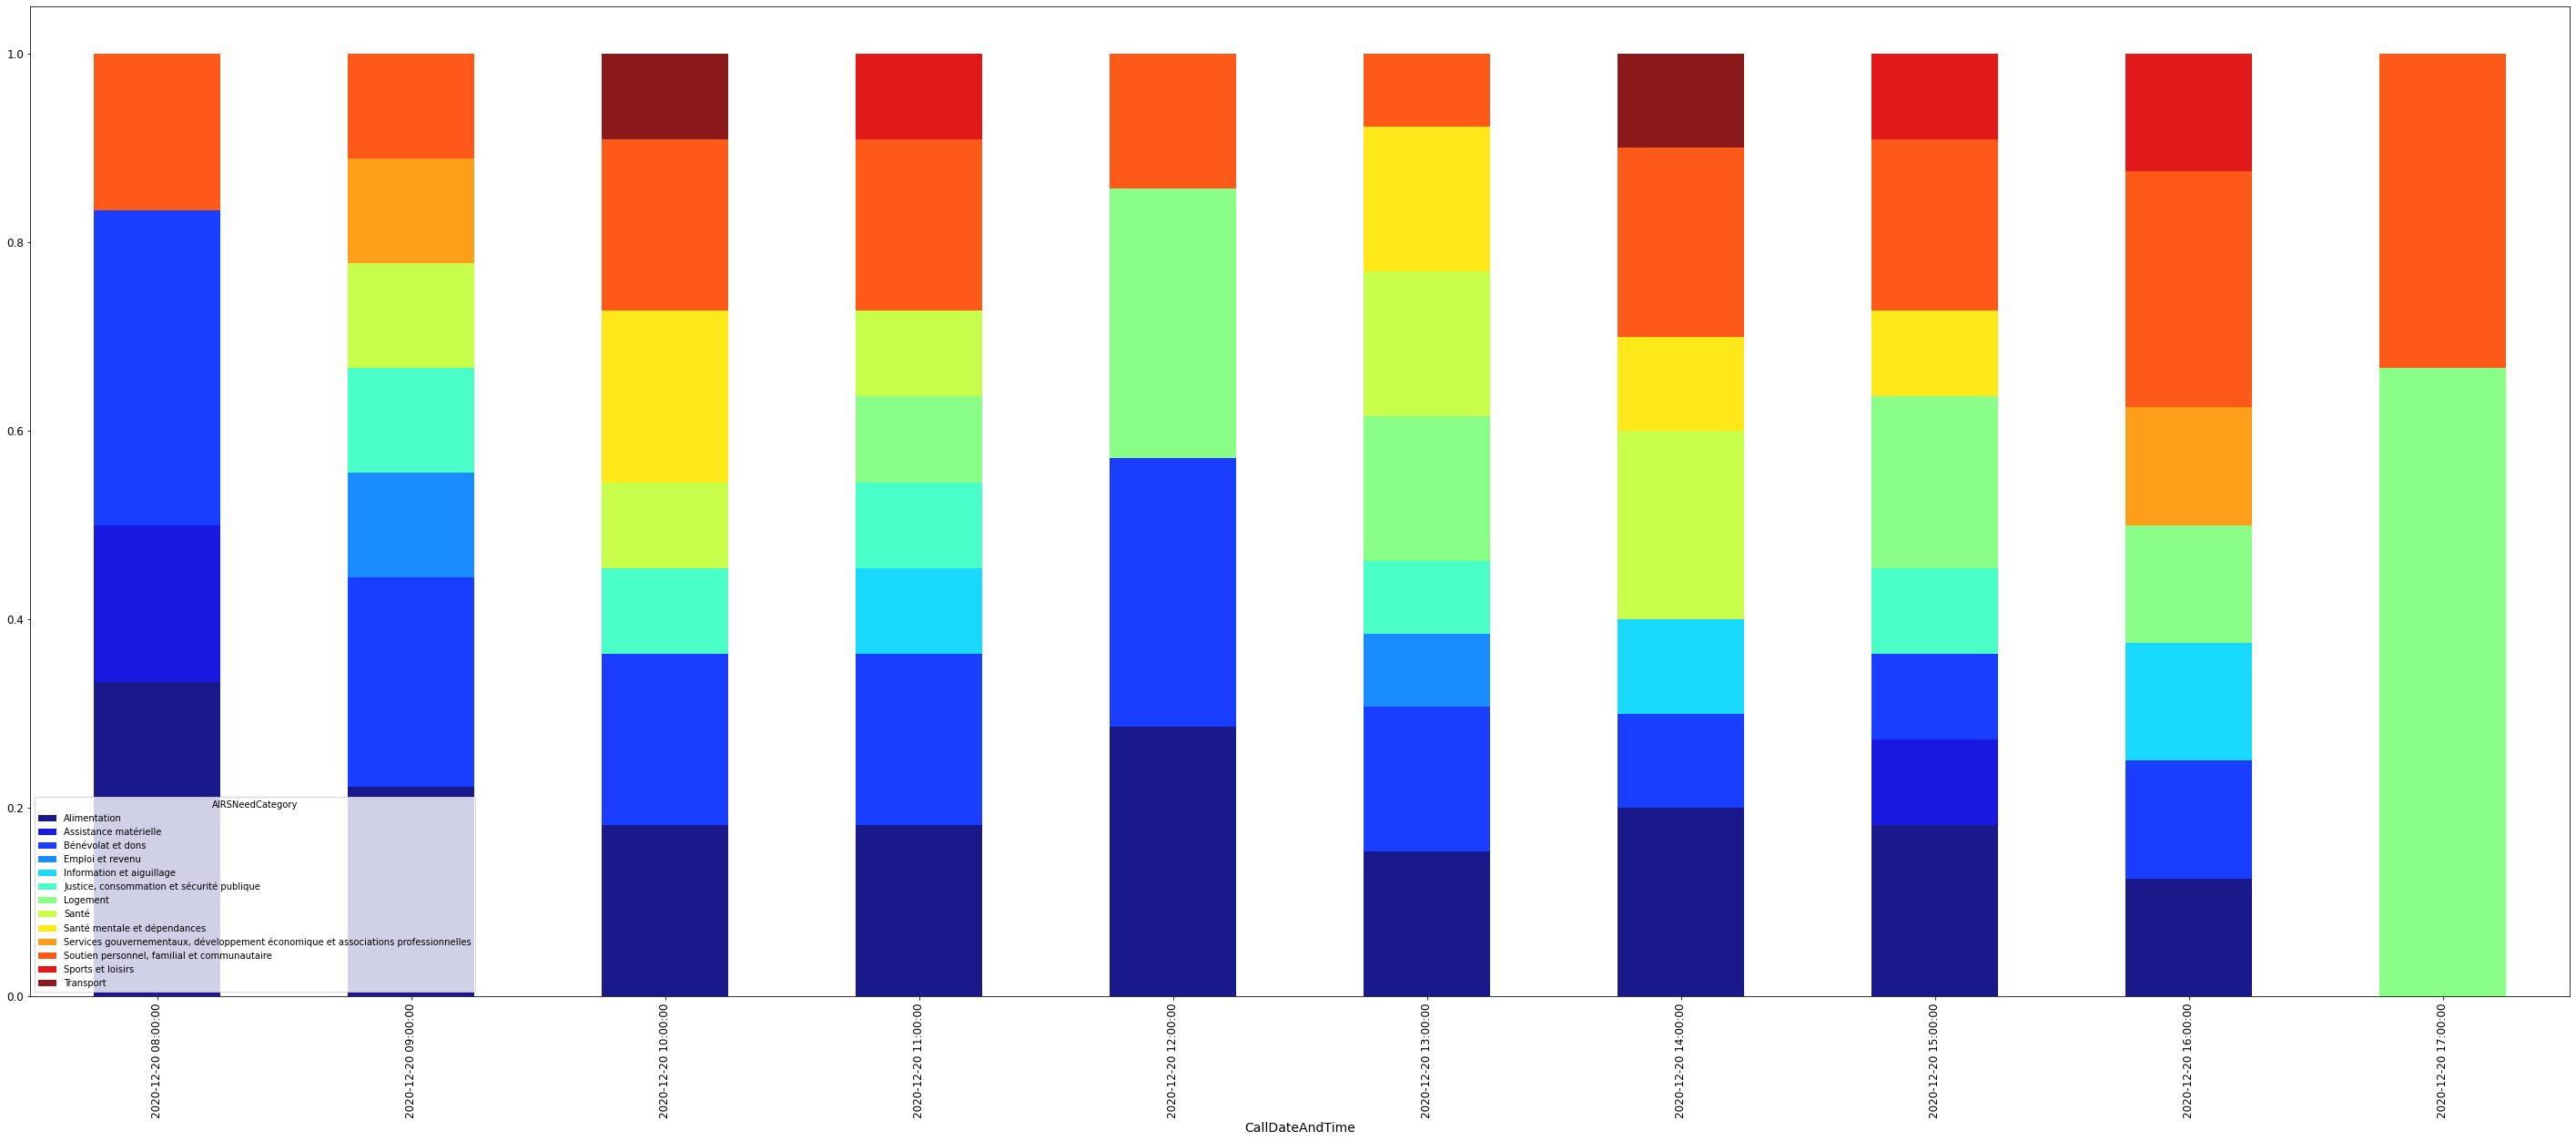

In [112]:
myday_calls.plot(kind='bar', figsize=(50, 20), cmap=plt.get_cmap('jet'), alpha=0.9, stacked=True)

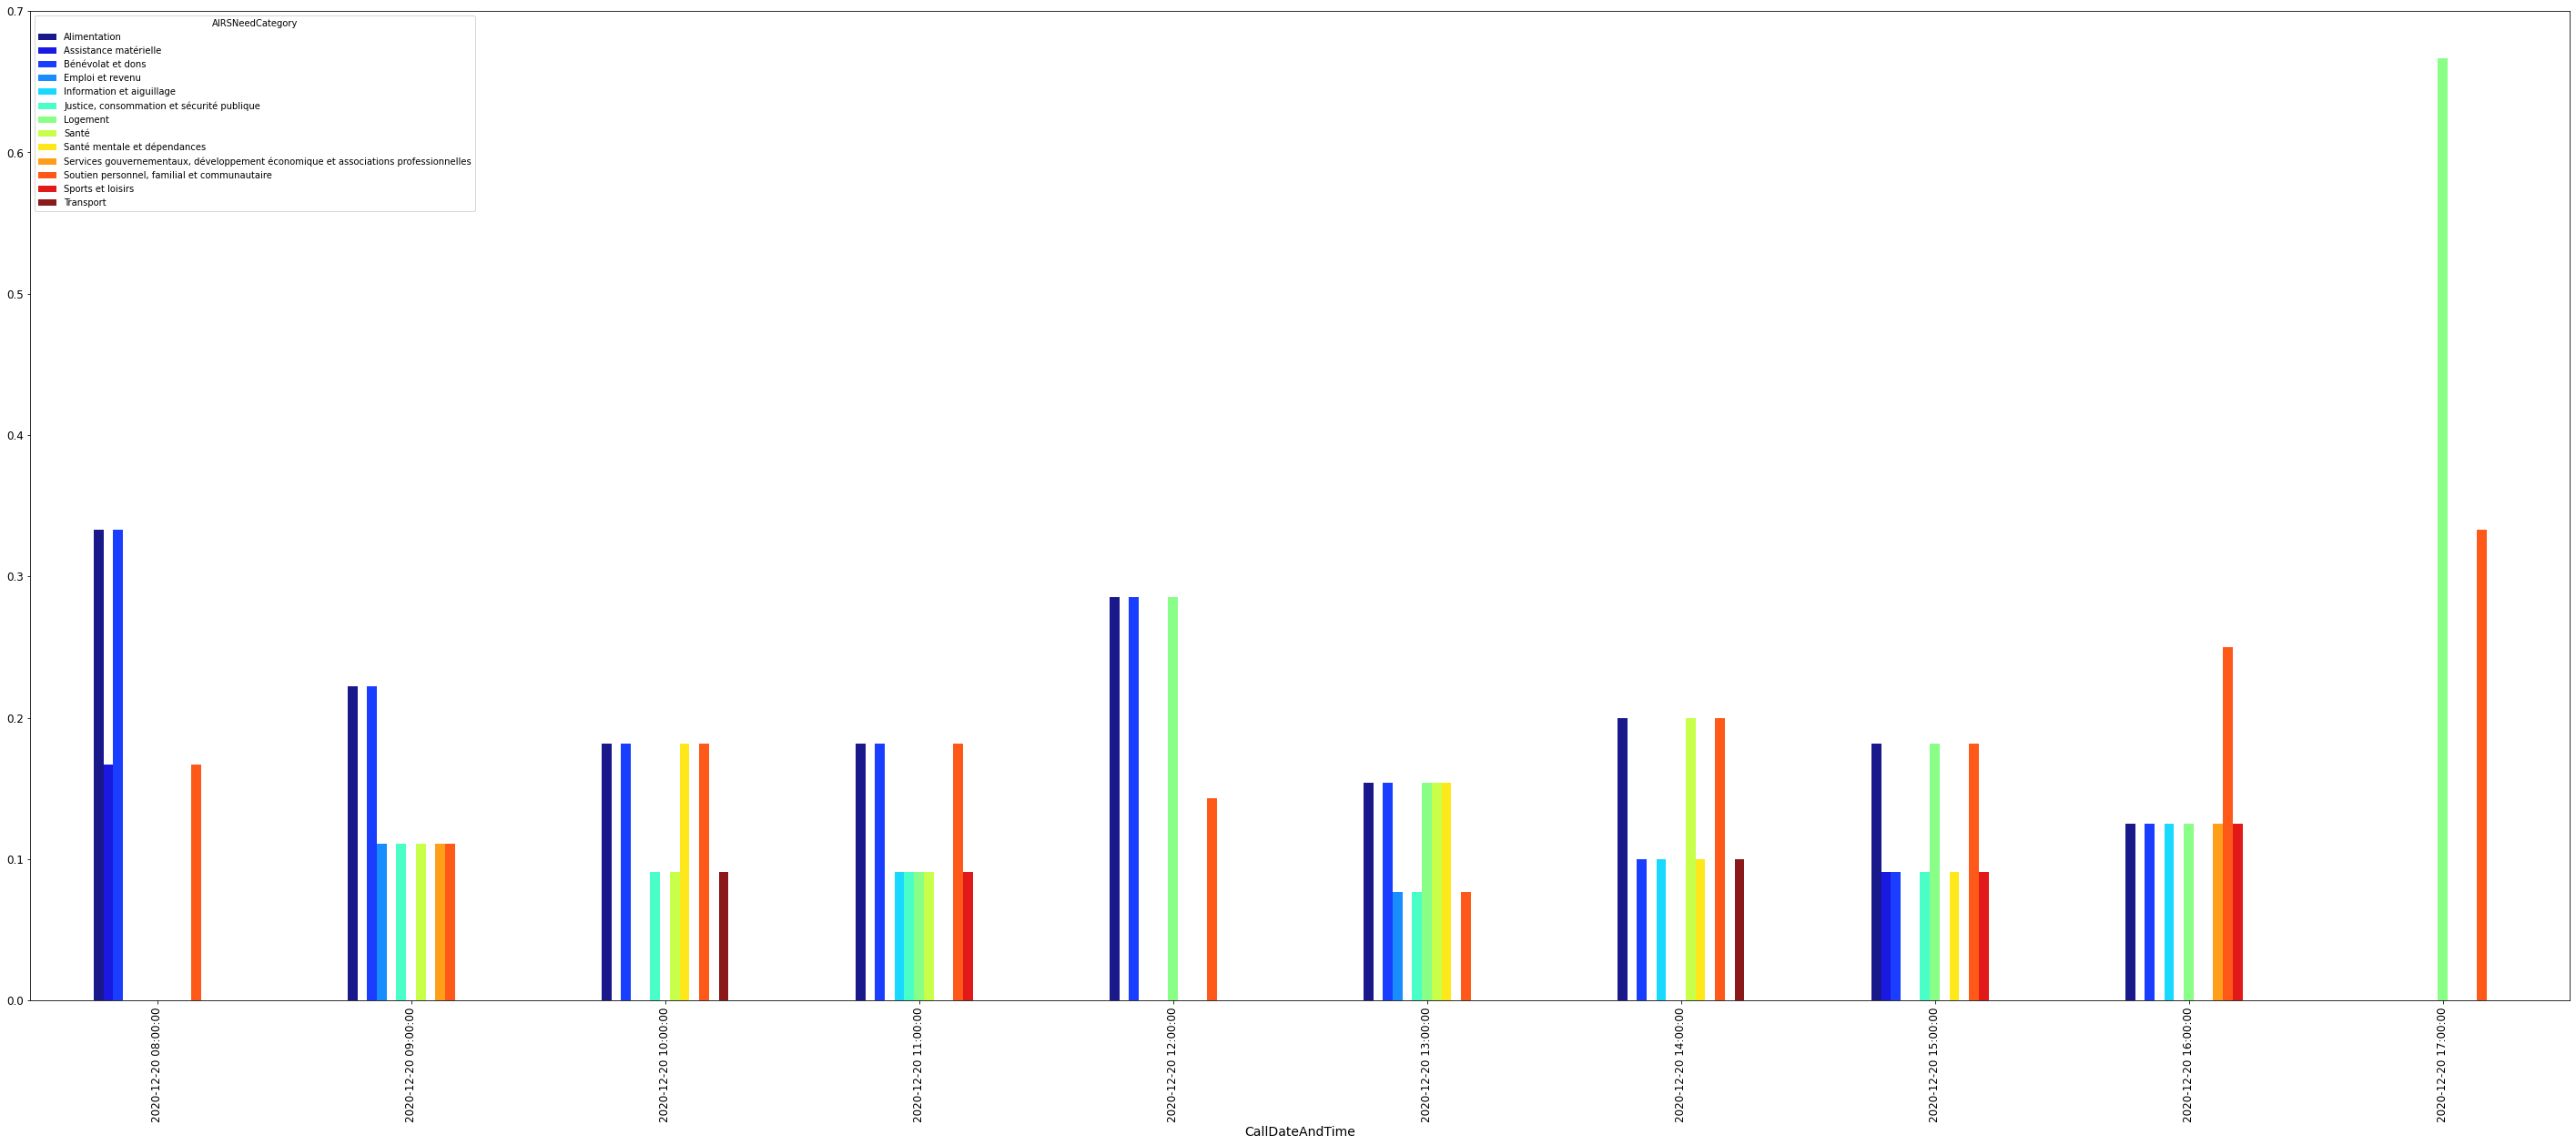

In [114]:
myday_calls.plot(kind='bar', figsize=(50, 20), cmap=plt.get_cmap('jet'), alpha=0.9)

In [ ]:
cd "/gdrive/My Drive/Colab Notebooks/AI4Good/"

/gdrive/My Drive/Colab Notebooks/AI4Good


In [ ]:
import joblib
joblib.dump(model, "model.pkl") # DIFF

['model.pkl']